<a href="https://colab.research.google.com/github/Hardik0175/Graph_Mining/blob/main/Hardik_Sharma_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install pycairo
!pip install python-igraph
!pip install plfit
!pip install networkx
!pip install partition-igraph
!pip install umap-learn

In [ ]:
import igraph as ig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from collections import Counter
import os
import umap
import pickle
import partition_igraph
import subprocess
from sklearn.metrics import adjusted_mutual_info_score as AMI

## we use those for the book, but you can change for other colors
cls_edges = 'gainsboro'
cls = ['silver','dimgray','black']

In [ ]:
datadir='/content/gdrive/My Drive/Datasets/'

abcd_path = '/content/gdrive/MyDrive/Datasets/ABCDMaster/utils/'

# Problem 1

Girvan-Newman for generating Figure 5.15 and Comparison with ground truth

In [ ]:
## This can take a while in view of the number of runs, mainly due to the clustering algorithms
## You can reduce the number of repeats (REP) for a faster test

L = []   ## store results in a list
REP = 3  ## number of graphs for each value of xi
XIs = [x/100 for x in np.arange(10,81,10)] ## values for xi
gn  = []

for rep in range(REP):
    print('repeat number',rep)
    ## generate new degree and community size values
    cmd = 'julia '+abcd_path+'deg_sampler.jl deg.dat 2.5 10 50 500 500'
    os.system(cmd)
    cmd = 'julia '+abcd_path+'com_sampler.jl cs.dat 1.5 50 100 500 500'
    os.system(cmd)
    gne = []
    ## generate graphs for a range of xi 
    for xi in XIs:
        cmd = 'julia '+abcd_path+'graph_sampler.jl net.dat comm.dat deg.dat cs.dat '\
                +str(xi)+' false false'
        os.system(cmd)
        print(xi)
        ## compute AMI for various clustering algorithms
        g = ig.Graph.Read_Ncol('net.dat',directed=False)
        c = np.loadtxt('comm.dat',dtype='uint16',usecols=(1))
        g.vs['comm'] = [c[int(x['name'])-1] for x in g.vs]
        ## clustering
        L.append(['ECG',xi,AMI(g.community_ecg().membership,g.vs['comm'])])
        L.append(['Louvain',xi,AMI(g.community_multilevel().membership,g.vs['comm'])])
        #L.append(['Leiden',xi,AMI(g.community_leiden('modularity').membership,g.vs['comm'])])
        #L.append(['CNM',xi,AMI(g.community_fastgreedy().as_clustering().membership,g.vs['comm'])])
        L.append(['Infomap',xi,AMI(g.community_infomap().membership,g.vs['comm'])])
        L.append(['Label Prop.',xi,AMI(g.community_label_propagation().membership,g.vs['comm'])])
        gg  = g.community_edge_betweenness().as_clustering().membership
        L.append(['Girvan Newman',xi,AMI(gg,g.vs['comm'])])
        gne.append(gg)
    gn.append(gne)

In [ ]:
## save in dataframe and take averages
D = pd.DataFrame(L,columns=['algo','xi','AMI'])
X = D.groupby(by=['algo','xi']).mean()


a = ['ECG','Louvain','Infomap','Label Prop.','Girvan Newman']
#a = ['ECG','Louvain','Infomap','Label Prop.','Leiden','CNM']
lt = ['-','--',':','-.','--',':']
cl = ['blue','green','purple','red','orange']
for i in range(len(a)):
    plt.plot(X.loc[(a[i])].index,X.loc[(a[i])],lt[i],label=a[i],color=cl[i])
plt.xlabel(r'ABCD noise ($\xi$)',fontsize=14)
plt.ylabel('AMI',fontsize=14)
plt.legend()
plt.savefig('abcd_study.png');

In [ ]:
## This can take a while in view of the number of runs, mainly due to the clustering algorithms
## You can reduce the number of repeats (REP) for a faster test

L2 = []   ## store results in a list
REP = 3  ## number of graphs for each value of xi
XIs = [x/100 for x in np.arange(10,81,10)] ## values for xi
gn  = []
mod = []

for rep in range(REP):
    print('repeat number',rep)
    ## generate new degree and community size values
    cmd = 'julia '+abcd_path+'deg_sampler.jl deg.dat 2.5 10 50 500 500'
    os.system(cmd)
    cmd = 'julia '+abcd_path+'com_sampler.jl cs.dat 1.5 50 100 500 500'
    os.system(cmd)
    gne = []
    ## generate graphs for a range of xi 
    for xi in XIs:
        cmd = 'julia '+abcd_path+'graph_sampler.jl net.dat comm.dat deg.dat cs.dat '\
                +str(xi)+' false false'
        os.system(cmd)
        print(xi)
        ## compute AMI for various clustering algorithms
        g = ig.Graph.Read_Ncol('net.dat',directed=False)
        c = np.loadtxt('comm.dat',dtype='uint16',usecols=(1))
        g.vs['comm'] = [c[int(x['name'])-1] for x in g.vs]
        ## clustering
        gg  = g.community_edge_betweenness().as_clustering().membership
        L2.append(['Girvan Newman',xi,AMI(gg,g.vs['comm'])])
        mod.append(['Girvan Newman',xi,g.modularity(gg)])
        gne.append(gg)
    gn.append(gne)

In [ ]:
df = pd.DataFrame(mod,columns=['algo','xi','mod'])
X1 = df.groupby(by=['algo','xi']).mean()

## save in dataframe and take averages
df2 = pd.DataFrame(L2,columns=['algo','xi','AMI'])
X2 = df2.groupby(by=['algo','xi']).mean()


In [ ]:
X1

In [ ]:
X2

In [ ]:
Ls = []   ## store results in a list
REP = 3  ## number of graphs for each value of xi
XIs = [x/100 for x in np.arange(10,81,10)] ## values for xi

for rep in range(REP):
    print('repeat number',rep)
    ## generate new degree and community size values
    cmd = 'julia '+abcd_path+'deg_sampler.jl deg.dat 2.5 10 50 500 500'
    os.system(cmd)
    cmd = 'julia '+abcd_path+'com_sampler.jl cs.dat 1.5 50 100 500 500'
    os.system(cmd)
    ## generate graphs for a range of xi 
    for xi in XIs:
        cmd = 'julia '+abcd_path+'graph_sampler.jl net.dat comm.dat deg.dat cs.dat '\
                +str(xi)+' false false'
        os.system(cmd)
        print(xi)
        ## compute AMI running various clustering algorithms twice

        g = ig.Graph.Read_Ncol('net.dat',directed=False)
        ml1 = g.community_multilevel().membership
        ec1 = g.community_ecg().membership
        lp1 = g.community_label_propagation().membership
        im1 = g.community_infomap().membership
        gn1 = g.community_edge_betweenness().as_clustering().membership
        ## permute vertices
        idx = np.random.permutation(g.vcount())
        gp = ig.Graph.Erdos_Renyi(n=g.vcount(),p=0)
        for e in g.es():
            gp.add_edge(idx[e.tuple[0]],idx[e.tuple[1]])
        ml = gp.community_multilevel().membership
        ml2 = [ml[idx[i]] for i in range(len(idx))]
        ec = gp.community_ecg().membership
        ec2 = [ml[idx[i]] for i in range(len(idx))]
        lp = gp.community_label_propagation().membership
        lp2 = [lp[idx[i]] for i in range(len(idx))]
        im = gp.community_infomap().membership
        im2 = [im[idx[i]] for i in range(len(idx))]  

        gn = g.community_edge_betweenness().as_clustering().membership
        gn2 = [gn[idx[i]] for i in range(len(idx))] 

        Ls.append(['ECG',xi,AMI(ec1,ec2)])
        Ls.append(['Louvain',xi,AMI(ml1,ml2)])
        Ls.append(['Label Prop.',xi,AMI(lp1,lp2)])
        Ls.append(['Infomap',xi,AMI(im1,im2)])
        Ls.append(['Girvan Newman',xi,AMI(gn1,gn2)])

In [ ]:
a = ['ECG','Louvain','Infomap','Label Prop.','Girvan Newman']
#a = ['ECG','Louvain','Infomap','Label Prop.','Leiden','CNM']
lt = ['-','--',':','-.','--',':']
cl = ['blue','green','purple','red','orange']

In [ ]:
## save in dataframe and take averages
D = pd.DataFrame(L,columns=['algo','xi','AMI'])
X = D.groupby(by=['algo','xi']).mean()
S = D.groupby(by=['algo','xi']).std()

a = ['ECG','Louvain','Label Prop.','Infomap','Girvan Newman']
#a = ['ECG','Louvain','Infomap','Label Prop.','Leiden','CNM']
lt = ['-','--',':','-.','--',':']
cl = ['blue','green','red','purple','orange']
for i in range(len(a)):
    #plt.plot(S.loc[(a[i])].index,S.loc[(a[i])],lt[i],label=a[i],color=cl[i])
    plt.plot(S.loc[(a[i])].index,S.loc[(a[i])],lt[i],label=a[i],color=cl[i])
plt.xlabel(r'ABCD noise ($\xi$)',fontsize=14)
plt.ylabel('Standard Deviation (AMI)',fontsize=14)
plt.legend();
#plt.savefig('abcd_study_stdv.eps');

In [ ]:
pickle.dump(Ls, open( datadir+"ABCD/abcd_study_stability.pkl", "wb" ) )

## load L and train/val/test ids
Ls = pickle.load(open(datadir+"ABCD/abcd_study_stability.pkl","rb"))

## save in dataframe and take averages
D = pd.DataFrame(Ls,columns=['algo','xi','AMI'])
X = D.groupby(by=['algo','xi']).mean()

In [ ]:
#a = ['ECG','Louvain','Leiden','CNM']
a = ['ECG','Louvain','Label Prop.','Infomap','Girvan Newman']
#a = ['ECG','Louvain','Infomap','Label Prop.','Leiden','CNM']
lt = ['-','--',':','-.','--',':']
cl = ['blue','green','red','purple','orange']
for i in range(len(a)):
    plt.plot(X.loc[(a[i])].index,X.loc[(a[i])],lt[i],label=a[i],color=cl[i])
plt.xlabel(r'ABCD noise ($\xi$)',fontsize=14)
plt.ylabel('AMI between successive runs',fontsize=14)
plt.legend();
#plt.savefig('abcd_study_stability.eps');

# Problem 2
For n = 1000 and xi = 0.1 as in graph used for quality measures

### Total Hubs: 282

1.   Peripheral hubs: 282
2.   Connectors hubs: 0
3.   Kinless hubs: 0

### Total Non-Hubs: 718

1.   Ultra-peripheral Nodes: 273
2.   Peripheral Nodes: 445
3.   Connectors Nodes: 0
4.   Kinless Nodes: 0

In [89]:
## generate new degree and community size values
cmd = 'julia '+abcd_path+'deg_sampler.jl deg.dat 2.5 5 50 1000 1000'
os.system(cmd)
cmd = 'julia '+abcd_path+'com_sampler.jl cs.dat 1.5 75 150 1000 1000'
os.system(cmd)
xi = .1
cmd = 'julia '+abcd_path+'graph_sampler.jl net.dat comm.dat deg.dat cs.dat '\
        +str(xi)+' false false'
os.system(cmd)
## compute AMI for various clustering algorithms
g = ig.Graph.Read_Ncol('net.dat',directed=False)
c = np.loadtxt('comm.dat',dtype='uint16',usecols=(1))
gt = [c[int(x['name'])-1]-1 for x in g.vs]
print(np.max(gt)+1)
c = np.loadtxt('comm.dat',dtype='uint16',usecols=(1))
g.vs['comm'] = [c[int(x['name'])-1] for x in g.vs]

10


In [90]:
seperated_in_degree = []
net_in_degree = np.zeros(len(g.vs['comm']))

for i in range(max(g.vs['comm'])):
  in_deg = g.subgraph_edges([e for e in g.es if g.vs['comm'][e.tuple[0]]==(i+1) and g.vs['comm'][e.tuple[1]]==(i+1)],
                            delete_vertices=False).degree()
  seperated_in_degree.append(in_deg)
  net_in_degree = np.add(net_in_degree,np.array(in_deg))

net_in_degree = net_in_degree.astype(int)

g.vs['in_deg']  = net_in_degree
g.vs['deg'] = g.degree()
g.vs['out_deg'] = [v['deg'] - v['in_deg'] for v in g.vs]

mu = [np.mean(x) for x in seperated_in_degree]
sig = [np.std(x) for x in seperated_in_degree]

g.vs['z'] = [(v['in_deg']-mu[v['comm']-1])/sig[v['comm']-1] for v in g.vs]
g.vs['p'] = [1-(v['in_deg']/v['deg'])**2-(v['out_deg']/v['deg'])**2 for v in g.vs]

D = pd.DataFrame(np.array([g.vs['z'],g.vs['p']]).transpose(),columns=['z','p']).sort_values(by='z',ascending=False)
D.head(8)

,z,p
226,13.029170,0.209751
209,12.685802,0.180000
396,12.380669,0.180000
122,12.351729,0.165289
165,11.701308,0.165289
397,11.679373,0.188366
321,11.663851,0.138750
48,11.170884,0.193762


In [91]:

D = pd.DataFrame(np.array([g.vs['z'],g.vs['p']]).transpose(),columns=['z','p']).sort_values(by='p',ascending=False)
D.head(8)

,z,p
552,0.815552,0.32
834,0.980173,0.32
206,1.205316,0.32
551,0.992076,0.32
550,0.815552,0.32
844,1.095805,0.32
319,0.815552,0.32
845,1.095805,0.32


In [92]:
# Hubs z > 2.5 
hubs = [i for i in g.vs if(i['z'] > 2.5)]
print("Total Hubs: "  + str(len(hubs)))

# peripheral hubs p < 0.30
peripheral_hubs = [i for i in g.vs if(i['z'] > 2.5 and i['p'] < .3)]
print(" *Peripheral hubs: "  + str(len(peripheral_hubs)))

# connectors hubs 0.30 =< p < 0.75
connectors_hubs = [i for i in g.vs if(i['z'] > 2.5 and i['p'] >= .3 and i['p']<.75)]
print(" *Connectors hubs: "  + str(len(connectors_hubs)))

# kinless hubs 0.75 >= p 
kinless_hubs = [i for i in g.vs if(i['z'] > 2.5 and i['p'] >= .75)]
print(" *Kinless hubs: "  + str(len(kinless_hubs)))

# Non-Hubs z < 2.5 
non_hubs = [i for i in g.vs if i['z'] <= 2.5]
print("Total Non-Hubs: "  + str(len(non_hubs)))

# ultra-peripheral nodes p < 0.05
ultra_peripheral_nodes = [i for i in g.vs if(i['z'] <= 2.5 and i['p'] < .05)]
print(" *Ultra-peripheral Nodes: "  + str(len(ultra_peripheral_nodes)))

# peripheral nodes 0.05 =< p < 0.62
peripheral_nodes = [i for i in g.vs if(i['z'] <= 2.5 and i['p'] >= .05 and i['p']<.62)]
print(" *Peripheral Nodes: "  + str(len(peripheral_nodes)))

# connectors nodes 0.62 < p < 0.80
connectors_nodes = [i for i in g.vs if(i['z'] <= 2.5 and i['p'] >= .62 and i['p']<.80)]
print(" *Connectors Nodes: "  + str(len(connectors_nodes)))

# kinless nodes 0.80 =< p
kinless_nodes = [i for i in g.vs if(i['z'] <= 2.5 and i['p'] >=.80)]
print(" *Kinless Nodes: "  + str(len(kinless_nodes)))


Total Hubs: 282
 *Peripheral hubs: 282
 *Connectors hubs: 0
 *Kinless hubs: 0
Total Non-Hubs: 718
 *Ultra-peripheral Nodes: 273
 *Peripheral Nodes: 445
 *Connectors Nodes: 0
 *Kinless Nodes: 0


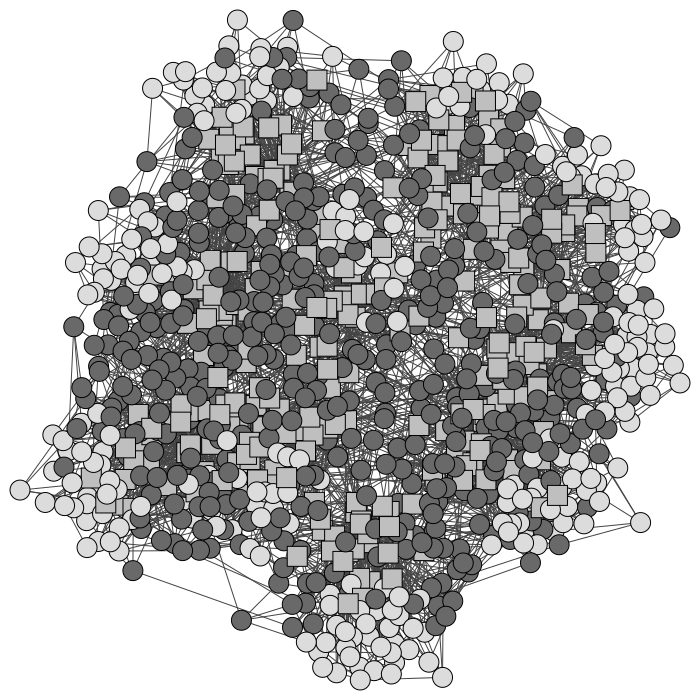

In [98]:
## plotting w.r.t. z (z>2.5 are hubs)
## color positive values in dark, negative in white
## largest values for node 0 (instructor) and node 33 (president) and node 32
g.vs['color'] = 'black'
g.vs['shape'] = 'circle'
for v in g.vs:
    if v['z']<2.5: ## non-hub
        if v['p'] < .62 and v['p'] >= .05: ## peripheral
            v['color'] = 'dimgrey'
        if v['p'] < .05: ## ultra-peripheral
            v['color'] = 'gainsboro'
    if v['z']>=2.5 and v['p'] < .3: ## hubs (all provincial here)            
        v['color'] = 'silver'
        v['shape'] = 'square'
#ig.plot(z, 'zachary_roles_1.eps', bbox=(0,0,350,250))
ig.plot(g, bbox=(0,0,700,700))

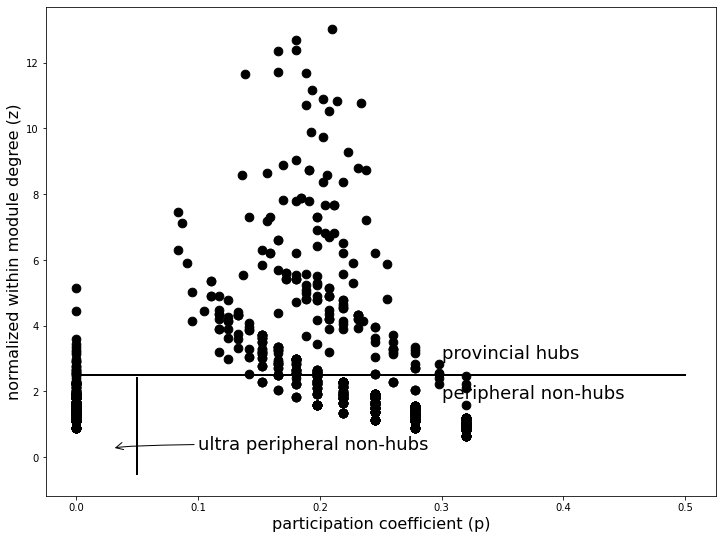

In [95]:
fig, ax = plt.subplots(figsize=(12,9))
ax.scatter(g.vs['p'],g.vs['z'],marker='o',s=75, color='k')

plt.plot([0, .5], [2.5, 2.5], color='k', linestyle='-', linewidth=2)
plt.plot([.05, .05], [-.5, 2.4], color='k', linestyle='-', linewidth=2);

ax.annotate('provincial hubs',(.3,3), fontsize=18)
ax.annotate('peripheral non-hubs',(.3,1.8), fontsize=18)
ax.annotate('ultra peripheral non-hubs',(.03,0.25),xytext=(.1,0.25), fontsize=18,
             arrowprops = dict( arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"))

plt.xlabel('participation coefficient (p)',fontsize=16)
plt.ylabel('normalized within module degree (z)',fontsize=16);

# Problem 3

Label Propagation is fastest and Girvan-Newman will be slowest (I was not able to experiment with different values of n on Girvan-Newman because it was taking a lot of time to execute )

In [66]:
N = [100,200,400,800,1600,3200,6400,12800]

In [22]:
Time_ECG  = []

for n in N:
    start_time = timeit.default_timer()
    cmd = 'julia '+abcd_path+'deg_sampler.jl deg.dat 2.5 10 50 '+str(n)+ ' ' + str(n)
    os.system(cmd)
    cmd = 'julia '+abcd_path+'com_sampler.jl cs.dat 1.5 50 100 '+str(n)+ ' ' + str(n)
    os.system(cmd)
    cmd = 'julia '+abcd_path+'graph_sampler.jl net.dat comm.dat deg.dat cs.dat '\
                +str(.1)+' false false'
    os.system(cmd)
    g = ig.Graph.Read_Ncol('net.dat',directed=False)
    l = g.community_ecg().membership
    stop_time = timeit.default_timer()
    total_time = stop_time-start_time
    Time_ECG.append(total_time)
    print(total_time)

8.654973761000065
5.955257702999916
5.985976806000053
6.108766809999906
6.343888963000154
6.734882234999986
7.84578664899982
10.214598274999844


In [29]:
Time_louvain  = []

for n in N:
    start_time = timeit.default_timer()
    cmd = 'julia '+abcd_path+'deg_sampler.jl deg.dat 2.5 10 50 '+str(n)+ ' ' + str(n)
    os.system(cmd)
    cmd = 'julia '+abcd_path+'com_sampler.jl cs.dat 1.5 50 100 '+str(n)+ ' ' + str(n)
    os.system(cmd)
    cmd = 'julia '+abcd_path+'graph_sampler.jl net.dat comm.dat deg.dat cs.dat '\
                +str(.1)+' false false'
    os.system(cmd)
    g = ig.Graph.Read_Ncol('net.dat',directed=False)
    l = g.community_multilevel().membership
    stop_time = timeit.default_timer()
    total_time = stop_time-start_time
    Time_louvain.append(total_time)
    print(total_time)
    

7.168839673000093
5.939405069000259
5.88817058199993
5.906861985999967
5.987436912999783
6.064970887999607
6.177806283999871
6.4522386560001905


In [24]:
Time_Infomap  = []

for n in N:
    start_time = timeit.default_timer()
    cmd = 'julia '+abcd_path+'deg_sampler.jl deg.dat 2.5 10 50 '+str(n)+ ' ' + str(n)
    os.system(cmd)
    cmd = 'julia '+abcd_path+'com_sampler.jl cs.dat 1.5 50 100 '+str(n)+ ' ' + str(n)
    os.system(cmd)
    cmd = 'julia '+abcd_path+'graph_sampler.jl net.dat comm.dat deg.dat cs.dat '\
                +str(.1)+' false false'
    os.system(cmd)
    g = ig.Graph.Read_Ncol('net.dat',directed=False)
    l = g.community_infomap().membership
    stop_time = timeit.default_timer()
    total_time = stop_time-start_time
    Time_Infomap.append(total_time)
    print(total_time)
    

9.481756674000053
6.010845735999965
5.983767575000002
6.073604138000064
6.3155312829999275
6.63666721300001
7.2557353909999165
8.844269875999998


In [30]:
Time_Label  = []

for n in N:
    start_time = timeit.default_timer()
    cmd = 'julia '+abcd_path+'deg_sampler.jl deg.dat 2.5 10 50 '+str(n)+ ' ' + str(n)
    os.system(cmd)
    cmd = 'julia '+abcd_path+'com_sampler.jl cs.dat 1.5 50 100 '+str(n)+ ' ' + str(n)
    os.system(cmd)
    cmd = 'julia '+abcd_path+'graph_sampler.jl net.dat comm.dat deg.dat cs.dat '\
                +str(.1)+' false false'
    os.system(cmd)
    g = ig.Graph.Read_Ncol('net.dat',directed=False)
    l = g.community_label_propagation().membership
    stop_time = timeit.default_timer()
    total_time = stop_time-start_time
    Time_Label.append(total_time)
    print(total_time)
    

7.061936090000017
5.83508433399993
5.905963339000209
5.918232121999608
5.975198870999975
5.991287757999999
6.181653844000266
6.462428146000093


In [27]:
Time_cnm  = []

for n in N:
    start_time = timeit.default_timer()
    cmd = 'julia '+abcd_path+'deg_sampler.jl deg.dat 2.5 10 50 '+str(n)+ ' ' + str(n)
    os.system(cmd)
    cmd = 'julia '+abcd_path+'com_sampler.jl cs.dat 1.5 50 100 '+str(n)+ ' ' + str(n)
    os.system(cmd)
    cmd = 'julia '+abcd_path+'graph_sampler.jl net.dat comm.dat deg.dat cs.dat '\
                +str(.1)+' false false'
    os.system(cmd)
    g = ig.Graph.Read_Ncol('net.dat',directed=False)
    l = g.community_fastgreedy().as_clustering().membership
    stop_time = timeit.default_timer()
    total_time = stop_time-start_time
    Time_cnm.append(total_time)
    print(total_time)

7.548048625000092
6.118214508000165
6.025921965999942
6.031899937999924
6.03305500700003
6.145214034999981
6.262713552999912
6.832336207000026


In [43]:

df_time = pd.DataFrame(Time_ECG,columns=['ECG']) 
df_time['Louvain'] = pd.DataFrame(Time_louvain) 
df_time['Infomap'] = pd.DataFrame(Time_Infomap)
df_time['Label Prop'] = pd.DataFrame(Time_Label) 
df_time['CNM'] = pd.DataFrame(Time_cnm) 


In [64]:
df_time

,ECG,Louvain,Infomap,Label Prop,CNM
0,8.654974,7.168840,9.481757,7.061936,7.548049
1,5.955258,5.939405,6.010846,5.835084,6.118215
2,5.985977,5.888171,5.983768,5.905963,6.025922
3,6.108767,5.906862,6.073604,5.918232,6.031900
4,6.343889,5.987437,6.315531,5.975199,6.033055
5,6.734882,6.064971,6.636667,5.991288,6.145214
6,7.845787,6.177806,7.255735,6.181654,6.262714
7,10.214598,6.452239,8.844270,6.462428,6.832336


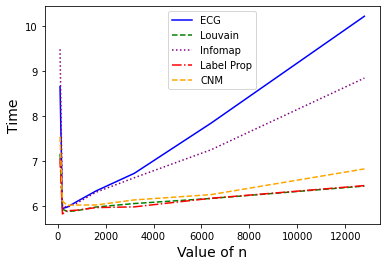

In [67]:

a = ['ECG','Louvain','Infomap','Label Prop','CNM']
#a = ['ECG','Louvain','Infomap','Label Prop.','Leiden','CNM']
lt = ['-','--',':','-.','--',':']
cl = ['blue','green','purple','red','orange']


for i in range(len(a)):
  plt.plot(N,df_time[a[i]],lt[i],label=a[i],color=cl[i])

plt.xlabel('Value of n',fontsize=14)
plt.ylabel('Time',fontsize=14)
plt.legend()
plt.savefig('time.png');

# Problem 4

Label Propagation and CNM gave an AMI value of 0.5911 so they are most similar as compared to other pairs

In [54]:
D = pd.read_csv(datadir+'GitHubDevelopers/musae_git_edges.csv')
tuples = [tuple(x) for x in D.values]
gh = ig.Graph.TupleList(tuples, directed = False)
X = pd.read_csv(datadir+'GitHubDevelopers/musae_git_target.csv')
idx = [int(i) for i in gh.vs['name']]
sorterIndex = dict(zip(idx,range(len(idx))))
X['Rank'] = X['id'].map(sorterIndex)
X.sort_values(['Rank'], ascending=[True],inplace=True)
X.dropna(inplace=True)
gh.vs['target'] = list(X['ml_target'])
cls = ['grey','black']
lbl = ['web','ml']
gh.vs['color'] = [cls[i] for i in list(X['ml_target'])]
gh.vs['lbl'] = [lbl[i] for i in list(X['ml_target'])]
gh.es['color'] = 'grey'
gh_ml = gh.subgraph([v for v in gh.vs() if v['lbl']=='ml'])

In [55]:
ecg = gh_ml.community_ecg().membership
louvain = gh_ml.community_multilevel().membership
infomap = gh_ml.community_infomap().membership
label_propagation = gh_ml.community_label_propagation().membership
cnm = gh_ml.community_fastgreedy().as_clustering().membership

In [60]:
ami_ecg_louvain = AMI(ecg,louvain)
ami_ecg_infomap = AMI(ecg,infomap)
ami_ecg_label_propagation = AMI(ecg,label_propagation)
ami_ecg_cnm = AMI(ecg,cnm)

ami_louvain_infomap = AMI(louvain, infomap)
ami_louvain_label_propagation = AMI(louvain, label_propagation)
ami_louvain_cnm = AMI(louvain, cnm)

ami_infomap_label_propagation = AMI(infomap, label_propagation)
ami_infomap_cnm = AMI(infomap, cnm)

ami_label_propagation_cnm = AMI(label_propagation, cnm)

In [61]:
print('AMI between ECG and Lauvain: ' + str(ami_ecg_louvain))
print('AMI between ECG and Infomap: ' + str(ami_ecg_infomap))
print('AMI between ECG and Label Propagation: ' + str(ami_ecg_label_propagation))
print('AMI between ECG and CNM: ' + str(ami_ecg_cnm))
print("")
print('AMI between Louvain and Infomap: ' + str(ami_louvain_infomap))
print('AMI between Louvain and Label Propagation: ' + str(ami_louvain_label_propagation))
print('AMI between Louvain and CNM: ' + str(ami_louvain_cnm))
print("")
print('AMI between Infomap and Label Propagation: ' + str(ami_infomap_label_propagation))
print('AMI between Infomap and CNM: ' + str(ami_infomap_cnm))
print("")
print('AMI between Label Propagation and CNM: ' + str(ami_label_propagation_cnm))
print("")


AMI between ECG and Lauvain: 0.5891633282873173
AMI between ECG and Infomap: 0.5680432472015186
AMI between ECG and Label Propagation: 0.49338815054291496
AMI between ECG and CNM: 0.5400686948180548

AMI between Louvain and Infomap: 0.49178036337851083
AMI between Louvain and Label Propagation: 0.588103269593357
AMI between Louvain and CNM: 0.578639834136386

AMI between Infomap and Label Propagation: 0.2984999908336348
AMI between Infomap and CNM: 0.46978198169190694

AMI between Label Propagation and CNM: 0.5911204898562558



# Problem 5

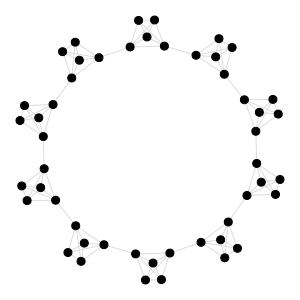

In [ ]:
## n cliques of size s
def ringOfCliques(n,s):
    roc = ig.Graph.Erdos_Renyi(n=n*s,p=0)
    ## cliques
    for i in range(n):
        for j in np.arange(s*i,s*(i+1)):
            for k in np.arange(j+1,s*(i+1)):
                roc.add_edge(j,k)
    ## ring
    for i in range(n):
        if i>0:
            roc.add_edge(s*i-1,s*i)
        else:
            roc.add_edge(n*s-1,0)
    roc.vs['size'] = 8
    roc.vs['color'] = cls[2]
    roc.es['color'] = cls_edges
    return roc
roc = ringOfCliques(10,5)
#ig.plot(roc,'ring_3.eps',bbox=(0,0,300,300))     
ig.plot(roc,bbox=(0,0,300,300))        

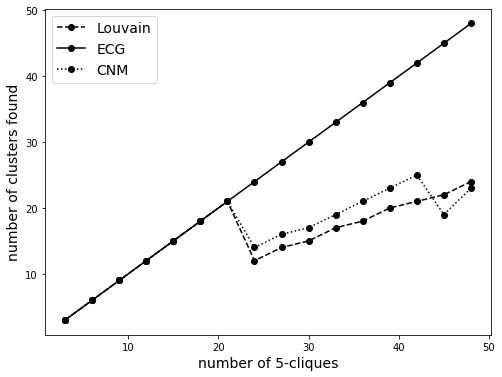

In [ ]:
## Compare number of cliques and number of clusters found
L = []
s = 5
for n in np.arange(3,50,3):
    roc = ringOfCliques(n,s)
    ml = np.max(roc.community_multilevel().membership)+1
    ec = np.max(roc.community_ecg().membership)+1
    cnm = np.max(roc.community_fastgreedy().as_clustering().membership)+1
    L.append([n,ml,ec,cnm])
D = pd.DataFrame(L,columns=['n','Louvain','ECG','CNM'])
plt.figure(figsize=(8,6))
plt.plot(D['n'],D['Louvain'],'--o',color='black',label='Louvain')
plt.plot(D['n'],D['ECG'],'-o',color='black',label='ECG')
plt.plot(D['n'],D['CNM'],':o',color='black',label='CNM')

plt.xlabel('number of '+str(s)+'-cliques',fontsize=14)
plt.ylabel('number of clusters found',fontsize=14)
plt.legend(fontsize=14);
#plt.savefig('rings.eps');

In [ ]:
## ECG weights in this case: all 30 clique edges have max score

roc.es['W'] = roc.community_ecg().W
Counter(roc.es['W'])

Counter({0.05: 48, 1.0: 144})

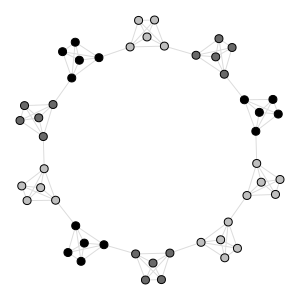

In [ ]:
## Louvain communities with 10 3-cliques

roc = ringOfCliques(n=10,s=5)
roc.vs['ml'] = roc.community_multilevel().membership
roc.vs['color'] = [cls[x%3] for x in roc.vs['ml']]
ig.plot(roc,'ring_3_q.eps', bbox=(0,0,300,300))

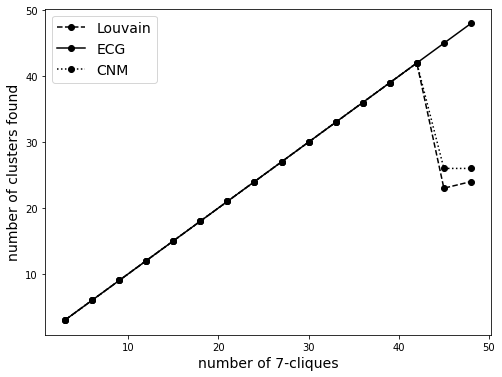

In [ ]:
## Compare number of cliques and number of clusters found
L = []
s = 7
for n in np.arange(3,50,3):
    roc = ringOfCliques(n,s)
    ml = np.max(roc.community_multilevel().membership)+1
    ec = np.max(roc.community_ecg().membership)+1
    cnm = np.max(roc.community_fastgreedy().as_clustering().membership)+1
    L.append([n,ml,ec,cnm])
D = pd.DataFrame(L,columns=['n','Louvain','ECG','CNM'])
plt.figure(figsize=(8,6))
plt.plot(D['n'],D['Louvain'],'--o',color='black',label='Louvain')
plt.plot(D['n'],D['ECG'],'-o',color='black',label='ECG')
plt.plot(D['n'],D['CNM'],':o',color='black',label='CNM')

plt.xlabel('number of '+str(s)+'-cliques',fontsize=14)
plt.ylabel('number of clusters found',fontsize=14)
plt.legend(fontsize=14);
#plt.savefig('rings.eps');

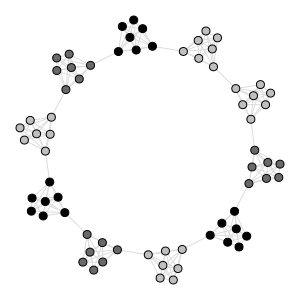

In [ ]:
## Louvain communities with 10 3-cliques

roc = ringOfCliques(n=10,s=7)
roc.vs['ml'] = roc.community_multilevel().membership
roc.vs['color'] = [cls[x%3] for x in roc.vs['ml']]
ig.plot(roc,'ring_3_q.eps', bbox=(0,0,300,300))